In [34]:
bkg = Bkg(get_qcd_ttbar('maxbtag_4b'))

/eos/uscms/store/user/srosenzw/sixb/ntuples
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT100to200_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT2000toInf_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_HT100to200_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_HT200to300_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/

In [43]:
model_loc = '/eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output'
sample_loc = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL'
tree_file = f'{sample_loc}/maxbtag_4b/Official_NMSSM/btagsf/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root'
assert 'maxbtag_4b' in tree_file
tree_feyn = f'{model_loc}/sf_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root'
tree = SixB(tree_file, gnn_model=tree_feyn)

[15:05:14] Loading                                                                                     ]8;id=970424;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=900468;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#89\89]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/btagsf/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-m             
           adgraph-pythia8/ntuple.root...                                                                          

[15:05:17] Loading                                                                                    ]8;id=895819;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=822087;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#183\183]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/sf_NMSSM              
           _XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                         

Calculating SF correction factors
REGION: concentric


In [44]:
tree.H_j_btag

array([[0.73339844, 0.9995117 , 0.17834473, 0.0096283 , 0.9863281 ,
        0.9223633 ],
       [0.7895508 , 0.9736328 , 0.97802734, 0.0129776 , 0.9375    ,
        0.01030731],
       [0.9995117 , 0.921875  , 0.953125  , 0.02032471, 0.00278664,
        0.9658203 ],
       ...,
       [0.99072266, 0.9814453 , 0.9995117 , 0.39746094, 0.9160156 ,
        0.99853516],
       [0.01525116, 0.8203125 , 0.99902344, 0.99853516, 0.03610229,
        0.9741211 ],
       [0.99658203, 0.9995117 , 0.9926758 , 0.08581543, 0.99853516,
        0.91748047]], dtype=float32)

In [39]:
bins = np.linspace(0,1.01,101)

In [40]:
bkg.scale

array([2.58087689e+02, 2.58087689e+02, 2.58087689e+02, ...,
       6.09234249e-03, 6.09234249e-03, 6.09234249e-03])

In [49]:
tree.nevents, len(tree.n_jet)

(76217, 76217)

In [50]:
scale = np.repeat(tree.scale, tree.nevents)

In [54]:
bkg.spherical_region()

REGION: concentric


Text(1, 0, 'Average b tag score')

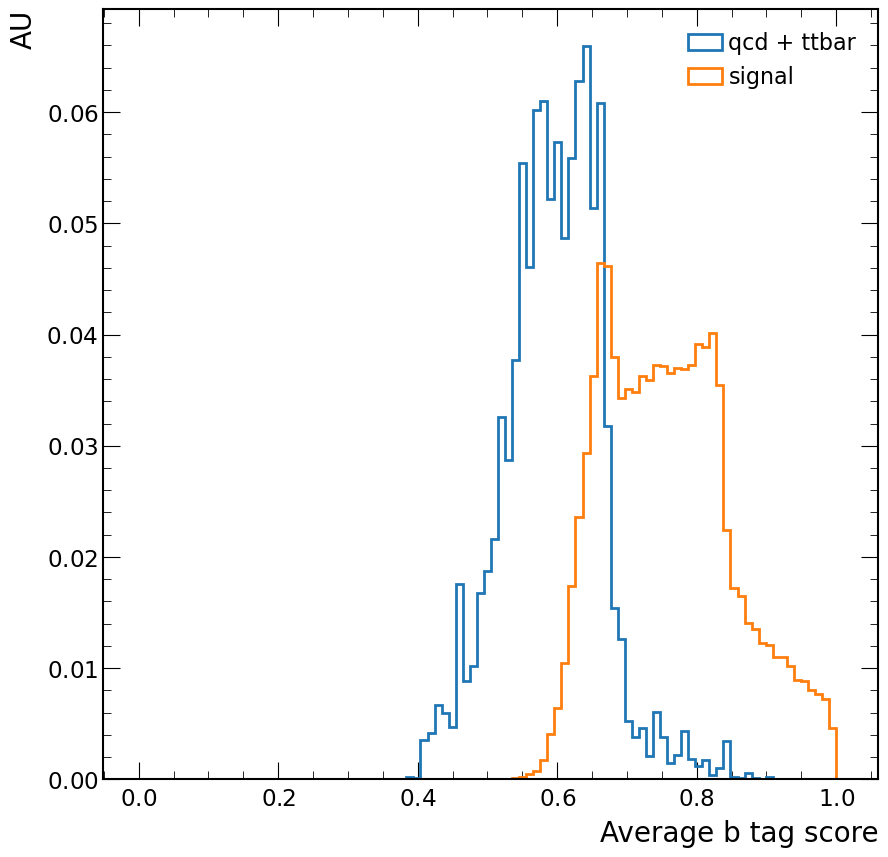

In [66]:
fig, ax = plt.subplots()

n = Hist(bkg.btag_avg, bins=bins, ax=ax, weights=bkg.scale/bkg.scale.sum(), label='qcd + ttbar')
n = Hist(tree.btag_avg, bins=bins, ax=ax, weights=tree.scale/scale.sum(), label='signal')

ax.set_ylabel('AU')
ax.set_xlabel('Average b tag score')

Text(1, 0, 'Product b tag score')

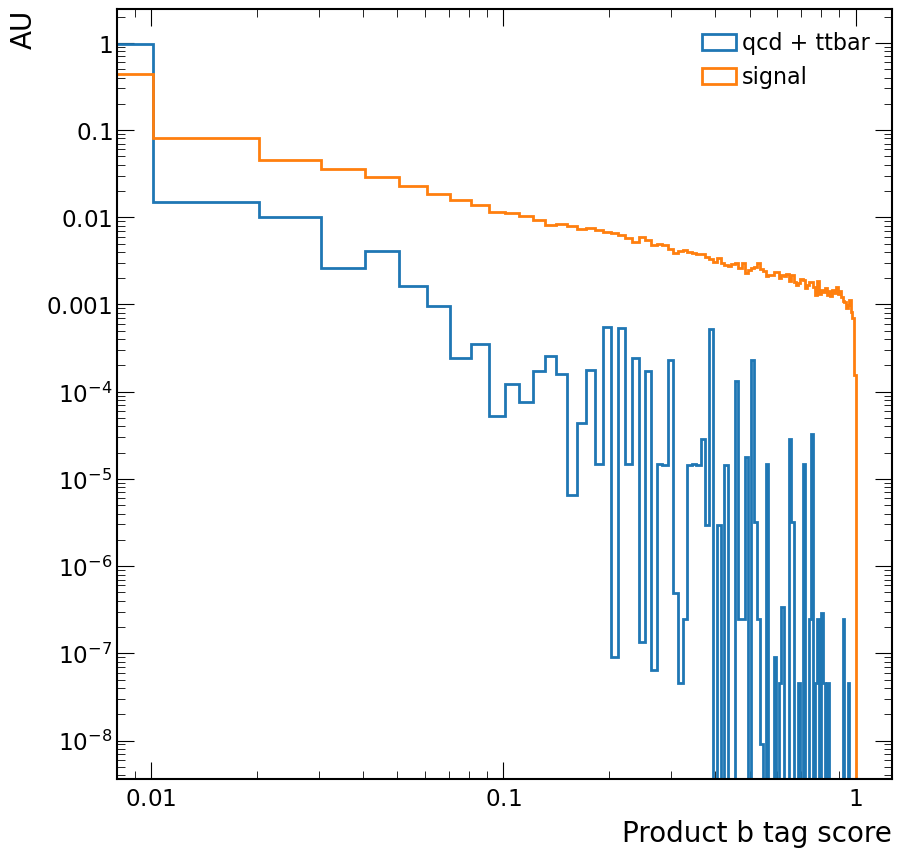

In [67]:
fig, ax = plt.subplots()

n = Hist(ak.prod(bkg.btag, axis=1), bins=bins, ax=ax, weights=bkg.scale/bkg.scale.sum(), label='qcd + ttbar')
n = Hist(ak.prod(tree.H_j_btag, axis=1), bins=bins, ax=ax, weights=tree.scale/scale.sum(), label='signal')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel('AU')
ax.set_xlabel('Product b tag score')

In [61]:
ak.prod(bkg.btag, axis=1)

<Array [0.00215, 0.00257, ..., 0.000171, 6.22e-05] type='18886 * float32'>

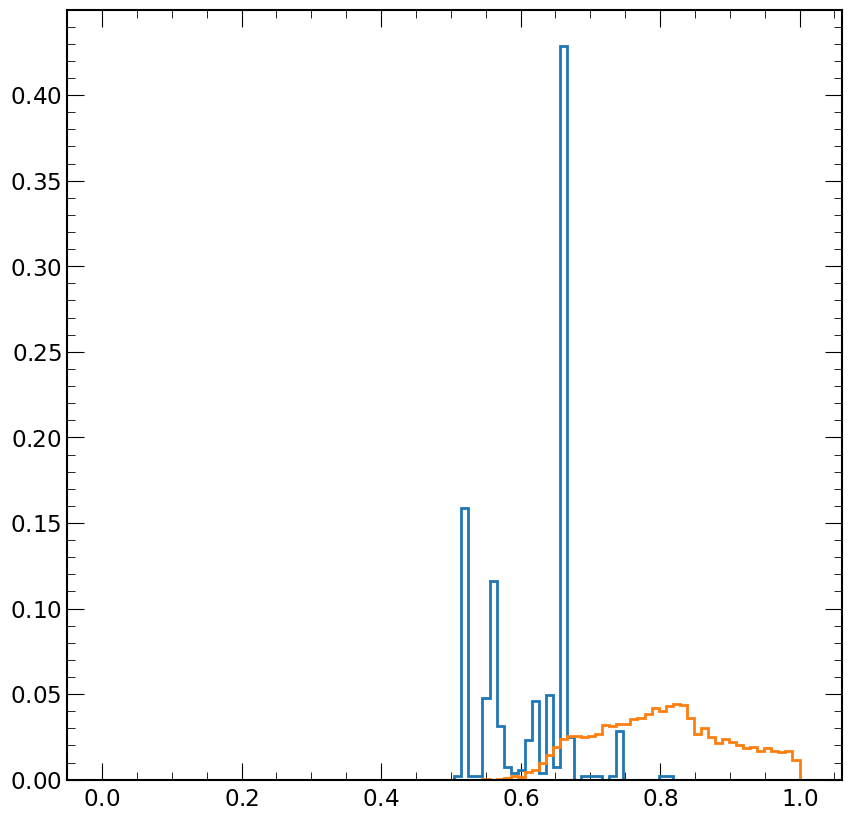

In [57]:
fig, ax = plt.subplots()

n = Hist(bkg.btag_avg[bkg.asr_mask], bins=bins, ax=ax, weights=bkg.scale[bkg.asr_mask]/bkg.scale[bkg.asr_mask].sum())
n = Hist(tree.btag_avg[tree.asr_mask], bins=bins, ax=ax, weights=scale[tree.asr_mask]/scale[tree.asr_mask].sum())